In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

# Load dataset

In [4]:
rdata = "processed.cleveland2.csv"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
Final  = pd.read_csv(rdata, names=column_names)

In [27]:
Final.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


# Shape of the data

In [28]:
Final.shape

(303, 14)

# Descriptive statistics

In [29]:
Final.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,130.676568,575.722772,0.148515,0.990099,808.409241,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,21.734575,5730.863994,0.356198,0.994971,8098.820289,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,0.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,99999.000000,1.000000,2.000000,99999.000000,1.000000,6.200000,3.000000,4.000000


# Class distribution

In [30]:
print(Final.groupby('num').size())

num
0    164
1     55
2     36
3     35
4     13
dtype: int64


# Identify Missing Values

In [32]:
raw_indices=Final.loc[(Final.values==99999).any(axis=1)].index.tolist()
print(raw_indices)

[132, 254, 281]


In [41]:
No_of_missing_value1 = (Final ==0).sum()
No_of_missing_value1

age           0
sex          97
cp            0
trestbps      3
chol          0
fbs         258
restecg     151
thalach       0
exang       204
oldpeak      99
slope         0
ca            0
thal          0
num         164
dtype: int64

In [42]:
No_of_missing_value2 = (Final== 99999).sum() 
No_of_missing_value2

age         0
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     2
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [43]:
No_of_missing_value = (Final ==0).sum() + (Final== 99999).sum() 
No_of_missing_value

age           0
sex          97
cp            0
trestbps      3
chol          1
fbs         258
restecg     151
thalach       2
exang       204
oldpeak      99
slope         0
ca            0
thal          0
num         164
dtype: int64

In [55]:
No_of_missing_value3 =  (Final=='?').sum() 
No_of_missing_value3

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [44]:
from scipy.stats import skew 
print(Final.skew(axis = 0, numeric_only=True ))

age         -0.209060
sex         -0.774935
cp          -0.841754
trestbps    -1.683536
chol        17.404759
fbs          1.986652
restecg      0.019900
thalach     12.246898
exang        0.742532
oldpeak      1.269720
slope        0.508316
num          1.058496
dtype: float64


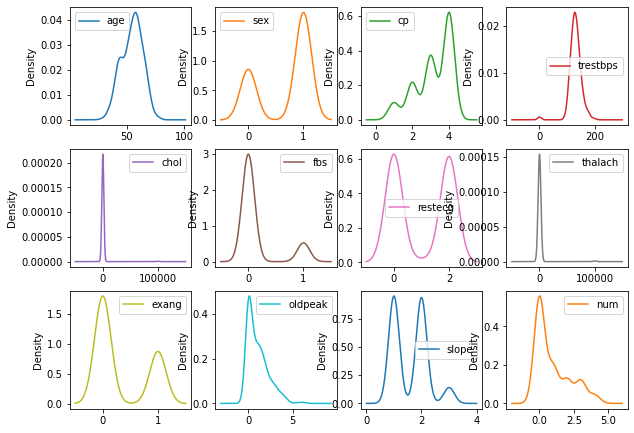

In [45]:
import matplotlib.pyplot as plt
import numpy as np
Final.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Create a correlation heatmap

In [46]:
Final.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.097542,0.104139,0.254735,-0.071013,0.118530,0.148868,-0.149539,0.091661,0.203805,0.161770,0.222853
sex,-0.097542,1.000000,0.010084,-0.016749,0.037656,0.047862,0.021647,0.055774,0.146201,0.102173,0.037533,0.224469
cp,0.104139,0.010084,1.000000,-0.036888,0.051145,-0.039975,0.067505,-0.056908,0.384060,0.202277,0.152050,0.407075
trestbps,0.254735,-0.016749,-0.036888,1.000000,-0.040649,0.161484,0.103360,-0.002581,0.052541,0.175221,0.090700,0.126223
chol,-0.071013,0.037656,0.051145,-0.040649,1.000000,-0.023929,-0.055776,-0.004722,-0.039508,0.008378,0.037293,-0.043307
fbs,0.118530,0.047862,-0.039975,0.161484,-0.023929,1.000000,0.069564,-0.034051,0.025665,0.005747,0.059894,0.059186
restecg,0.148868,0.021647,0.067505,0.103360,-0.055776,0.069564,1.000000,0.000567,0.084867,0.114133,0.133946,0.183696
thalach,-0.149539,0.055774,-0.056908,-0.002581,-0.004722,-0.034051,0.000567,1.000000,-0.057829,-0.074045,-0.080642,-0.063439
exang,0.091661,0.146201,0.384060,0.052541,-0.039508,0.025665,0.084867,-0.057829,1.000000,0.288223,0.257748,0.397057
oldpeak,0.203805,0.102173,0.202277,0.175221,0.008378,0.005747,0.114133,-0.074045,0.288223,1.000000,0.577537,0.504092


<AxesSubplot:>

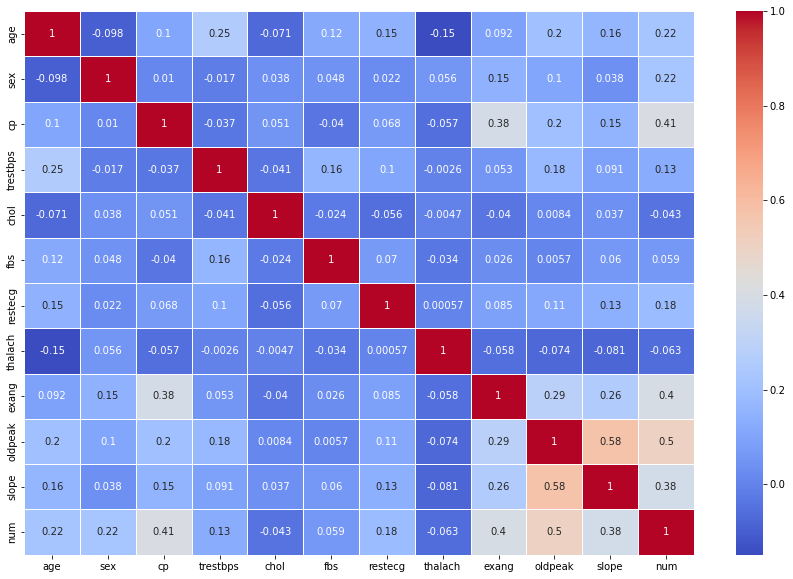

In [47]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(Final.corr(),annot=True,cmap='coolwarm',linewidths=.5)

# Histograms 

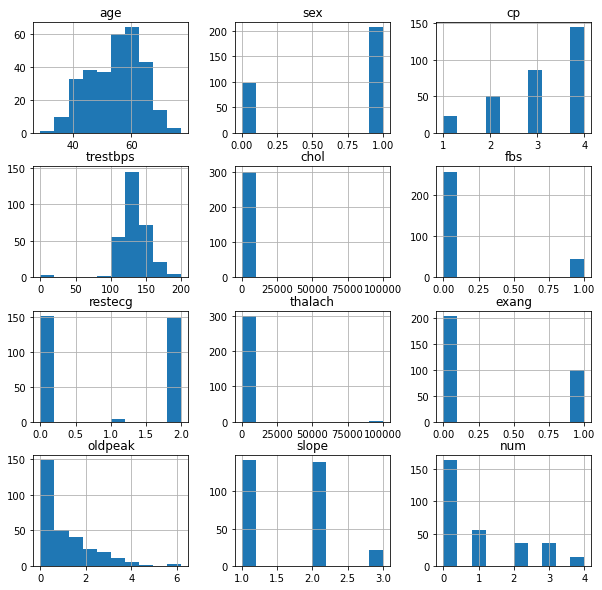

In [79]:
Final.hist(figsize=(10,10))
plt.show()

# box and whisker plots

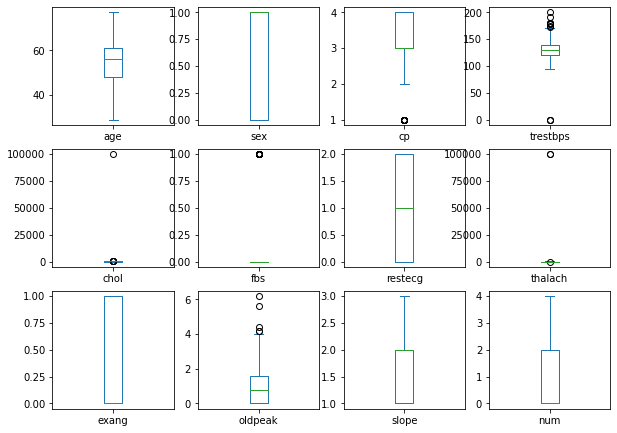

In [56]:
Final.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Scatter plot matrix

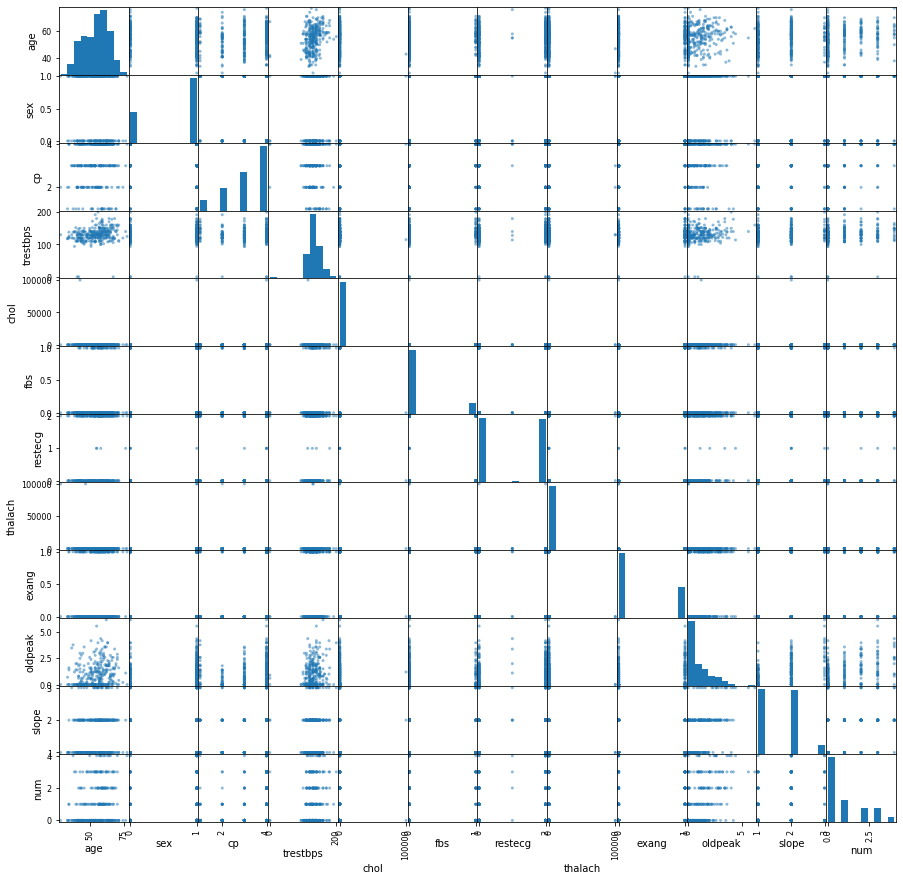

In [52]:
from pandas.plotting import scatter_matrix
scatter_matrix(Final,figsize=(15, 15))
plt.show()

# ***Data Cleaning & Preprocessing***

In [18]:
# df = pd.read_csv("sample_data/cleveland.data", delim_whitespace=True, encoding='utf-8', on_bad_lines='skip')
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv("processed.cleveland2.csv", names=column_names, na_values=["?"])
df[['trestbps']]=df[['trestbps']].replace(0,np.nan)
df[['chol','thalach']]=df[['chol','thalach']].replace(99999,np.nan)

In [19]:
df[['trestbps']]=df[['trestbps']].replace(0,np.nan)

In [20]:
df[['chol','thalach']]=df[['chol','thalach']].replace(99999,np.nan)

In [70]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0


In [21]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [73]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,291.0,54.742268,8.884638,34.0,48.0,56.0,61.0,77.0
sex,291.0,0.676976,0.468437,0.0,0.0,1.0,1.0,1.0
cp,291.0,3.158076,0.966202,1.0,3.0,3.0,4.0,4.0
trestbps,291.0,132.065292,17.662522,94.0,120.0,130.0,140.0,200.0
chol,291.0,247.219931,52.189374,126.0,211.5,242.0,275.5,564.0
fbs,291.0,0.147766,0.355480,0.0,0.0,0.0,0.0,1.0
restecg,291.0,0.996564,0.994808,0.0,0.0,1.0,2.0,2.0
thalach,291.0,149.326460,22.702422,71.0,133.5,152.0,165.0,195.0
exang,291.0,0.329897,0.470985,0.0,0.0,0.0,1.0,1.0
oldpeak,291.0,1.068041,1.172784,0.0,0.0,0.8,1.8,6.2


In [75]:
print(df.groupby('num').size())

num
0    155
1     54
2     35
3     34
4     13
dtype: int64


<AxesSubplot:xlabel='num', ylabel='count'>

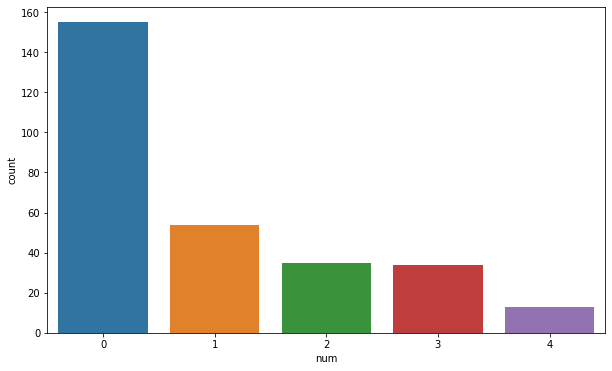

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x='num', data=df)

 # Density Plot

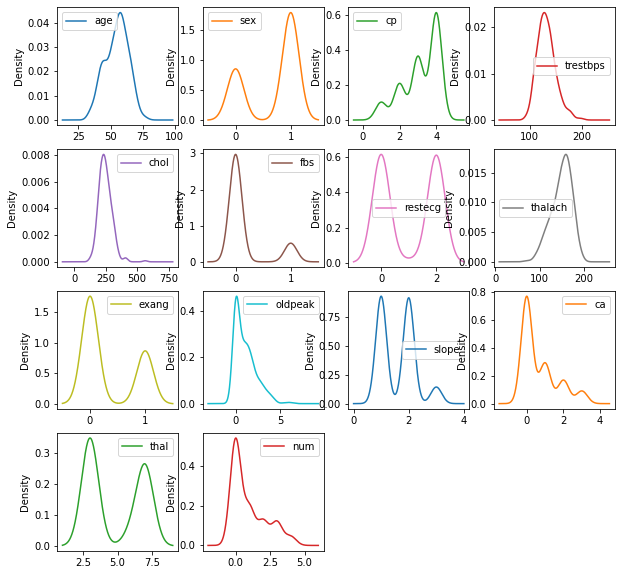

In [77]:
import matplotlib.pyplot as plt
import numpy as np
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Correlation Plot

<AxesSubplot:>

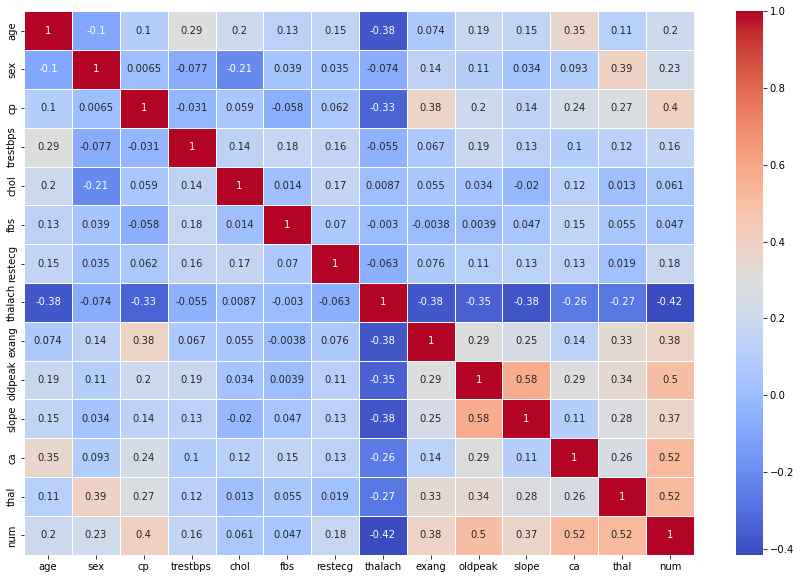

In [78]:
df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=.5)

 # Histograms Plot

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

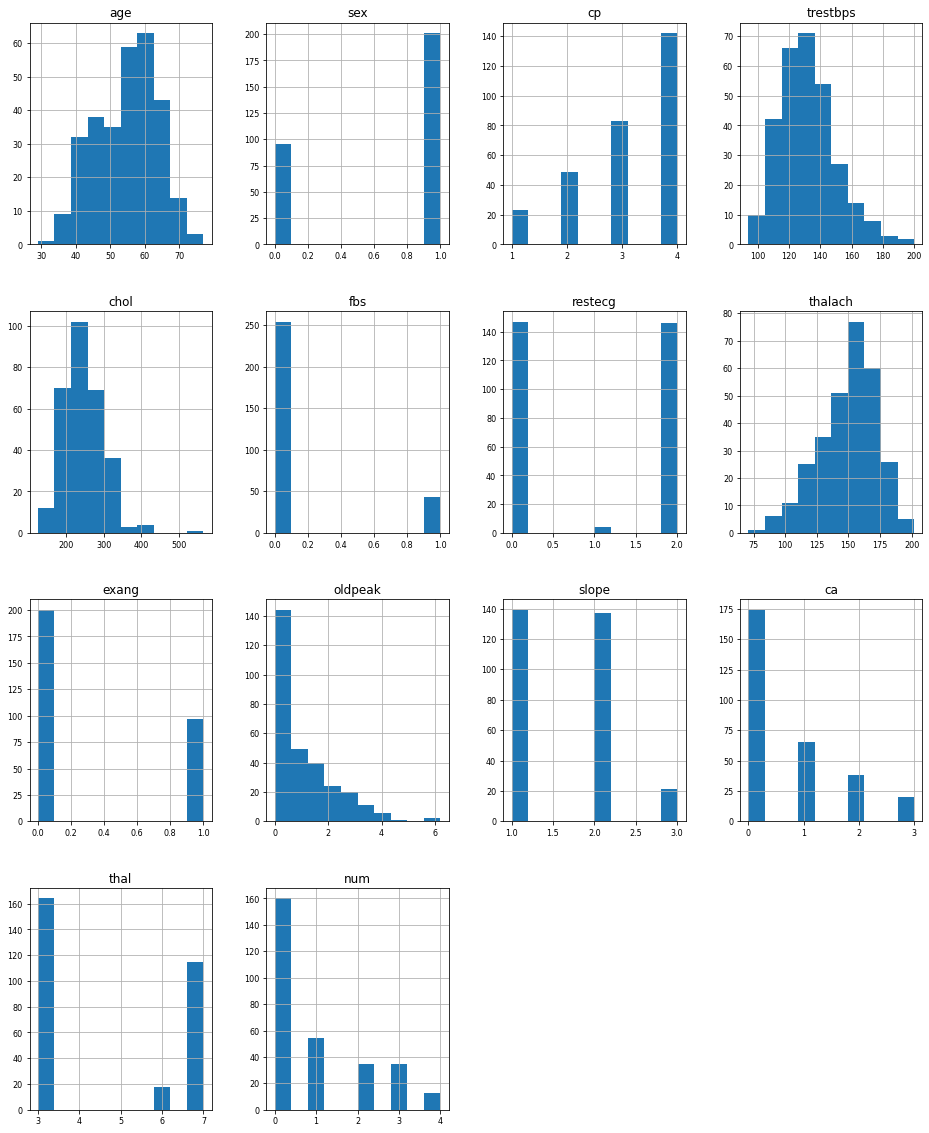

In [75]:
df.hist(figsize=(10,10))
plt.show()

# box and whisker plots

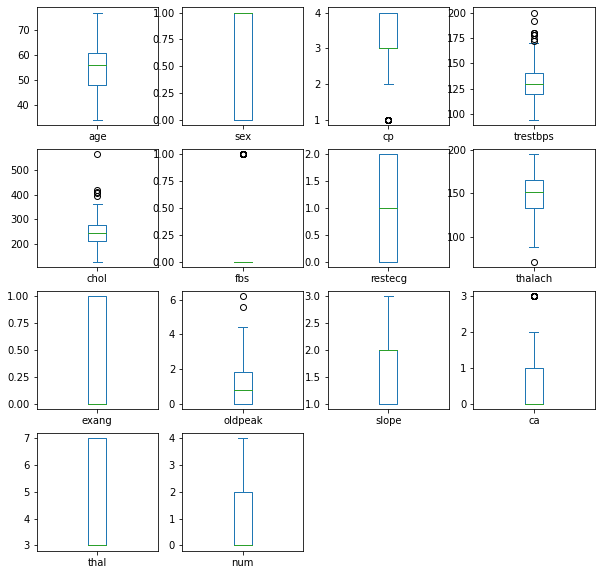

In [80]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(10,10))
plt.show()

# Scatter plot matrix

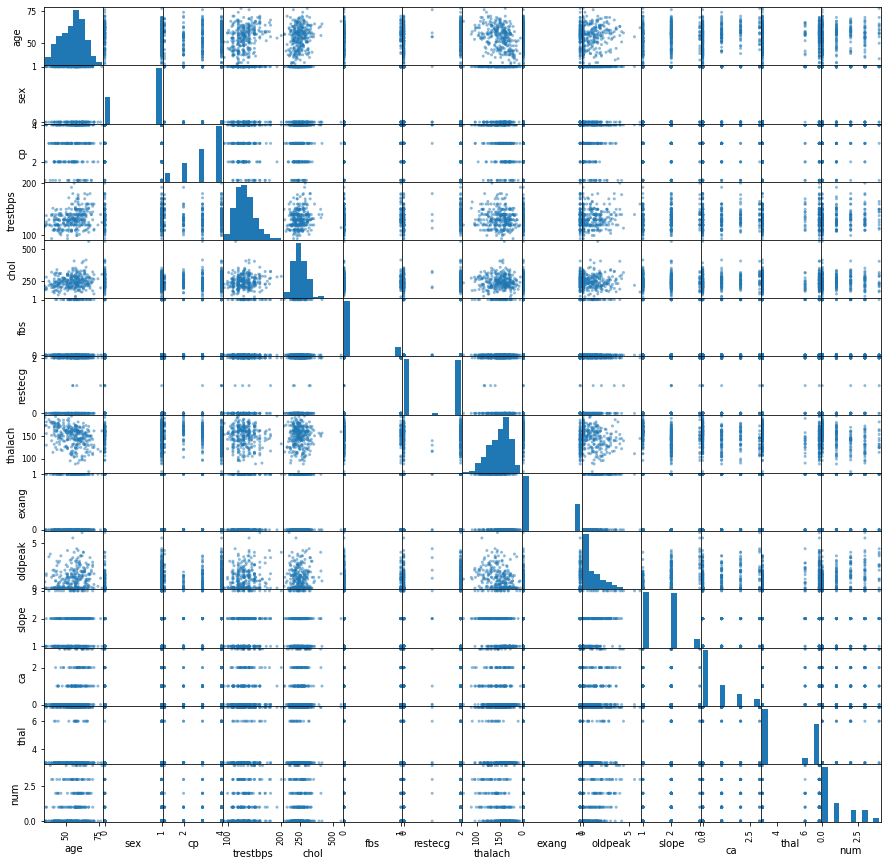

In [82]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,15))
plt.show()

# Univariate Selection

In [22]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Load dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df1 = pd.read_csv("processed.cleveland2.csv", names=column_names, na_values=["?"])
df1[['trestbps']]=df1[['trestbps']].replace(0,np.nan)
df1[['chol','thalach']]=df1[['chol','thalach']].replace(99999,np.nan)
df1.dropna(inplace=True)
array = df1.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 22.967   7.387  16.207  18.706  38.745   6.859  12.36  206.772  36.417
  96.388   9.939 102.878  69.147]


# Feature Extraction with PCA

In [23]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df1 = pd.read_csv("processed.cleveland2.csv", names=column_names, na_values=["?"])
df1[['trestbps']]=df1[['trestbps']].replace(0,np.nan)
df1[['chol','thalach']]=df1[['chol','thalach']].replace(99999,np.nan)
df1.dropna(inplace=True)
array = df1.values
X = array[:,0:13]
Y = array[:,13]
# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance:%s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance:[0.751 0.146 0.084 0.016 0.001]
[[ 3.548e-02 -1.872e-03  1.075e-03  5.418e-02  9.979e-01  1.209e-04
   3.235e-03  2.863e-03  5.017e-04  8.603e-04 -2.055e-04  2.141e-03
   5.889e-04]
 [ 1.748e-01  1.263e-03  1.354e-02  1.275e-01 -1.042e-02  4.370e-04
   3.540e-03 -9.755e-01  7.659e-03  1.847e-02  1.055e-02  1.162e-02
   2.380e-02]
 [ 1.222e-01 -1.619e-03 -5.512e-03  9.791e-01 -5.798e-02  3.617e-03
   7.031e-03  1.508e-01 -3.440e-04  8.284e-03  2.298e-03  2.880e-03
   8.130e-03]
 [ 9.758e-01 -5.388e-03 -5.391e-03 -1.474e-01 -2.722e-02  3.821e-03
   8.177e-03  1.557e-01 -7.887e-03 -2.982e-03 -3.940e-03  2.837e-02
  -1.220e-02]
 [-3.600e-03 -9.808e-02 -1.310e-01  1.466e-02  4.407e-04 -7.331e-03
  -5.583e-03 -3.085e-02 -6.386e-02 -2.208e-01 -7.621e-02 -1.299e-01
  -9.468e-01]]


[0.751 0.146 0.084 0.016 0.001]


Text(0, 0.5, 'Explained variance')

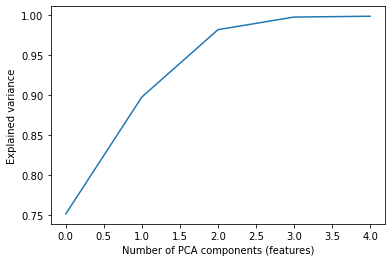

In [57]:
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PCA components (features)')
plt.ylabel('Explained variance')

# ***Dimensionality Reduction with PCA***

In [11]:
def get_models():
	models = dict()
	for i in range(1,25):
		steps = [('pca', PCA(n_components=i)), ('m', SVC(kernel='linear'))]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [12]:
pca = PCA()
pca.fit(X)
pca.transform(X)

array([[-1.31937921e+01,  2.61513873e+00,  1.46428296e+01, ...,
        -2.30521268e-01, -3.63476412e-01,  6.33783660e-01],
       [ 4.05363789e+01,  4.56329074e+01,  2.03658341e+01, ...,
        -7.58618848e-01, -1.01579655e-01, -4.56517334e-01],
       [-1.84491735e+01,  2.07450448e+01, -1.22890114e+01, ...,
        -2.34505825e-01,  2.86923088e-01, -1.75507150e-01],
       ...,
       [-5.30089843e+01,  1.26486582e+01,  1.52263230e+01, ...,
         2.31056017e-01, -5.33691580e-01,  7.75699770e-01],
       [-1.16104845e+02,  3.49058705e+01, -1.77189767e-01, ...,
        -2.54088151e-01,  2.68671800e-01, -1.71420144e-01],
       [-1.11556464e+01, -2.38910851e+01,  2.61824294e+00, ...,
         1.91930948e-01,  3.48332659e-01, -2.84065131e-01]])

C:\Users\myneee101\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


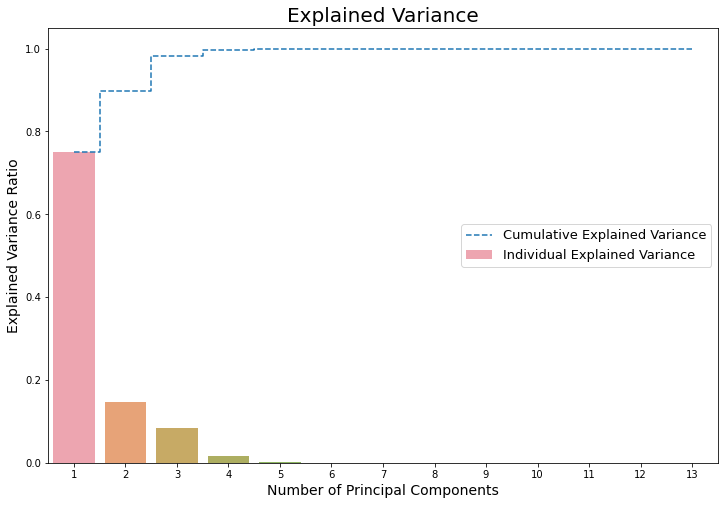

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(range(X.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', label='Cumulative Explained Variance')
sns.barplot(np.arange(1, X.shape[1]+1), pca.explained_variance_ratio_, alpha=0.85,
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);

In [16]:
# Load libraries
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [25]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.581905 (0.053125)
LDA: 0.596190 (0.063969)
KNN: 0.473810 (0.099864)
CART: 0.512143 (0.084458)
NB: 0.536190 (0.083318)
SVM: 0.527143 (0.020817)


In [26]:
array = df1.values
X = array[:,0:10]
y = array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.631667 (0.086282)
SVM: 0.482857 (0.019396)


In [83]:
df = pd.get_dummies(df, columns=['cp'], dummy_na=False)
df = pd.get_dummies(df, columns=['sex'], dummy_na=False)
df = pd.get_dummies(df, columns=['fbs'], dummy_na=False)
df = pd.get_dummies(df, columns=['exang'], dummy_na=False)
df = pd.get_dummies(df, columns=['restecg'], dummy_na=False)
df = pd.get_dummies(df, columns=['slope'], dummy_na=False)
df = pd.get_dummies(df, columns=['ca'], dummy_na=False)
df = pd.get_dummies(df, columns=['thal'], dummy_na=False)

df.head()

,age,trestbps,chol,thalach,oldpeak,num,cp_1,cp_2,cp_3,cp_4,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67,160.0,286.0,108.0,1.5,2,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [46]:
df['num'] = df.apply(lambda x: (1 if x['num']>0 else 0), axis=1)
df.head(10)

,age,trestbps,chol,thalach,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
5,56.0,120.0,236.0,178.0,0.8,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6,62.0,140.0,268.0,160.0,3.6,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
7,57.0,120.0,354.0,163.0,0.6,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
8,63.0,130.0,254.0,147.0,1.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
9,53.0,140.0,203.0,155.0,3.1,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1


# ***Data Analysis & Visualization***

In [47]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,num,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.458746,0.075908,0.165017,0.283828,0.475248,...,0.468647,0.462046,0.069307,0.580858,0.214521,0.125413,0.066007,0.547855,0.059406,0.386139
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.499120,0.265288,0.371809,0.451600,0.500213,...,0.499842,0.499382,0.254395,0.494235,0.411169,0.331734,0.248704,0.498528,0.236774,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='num', ylabel='count'>

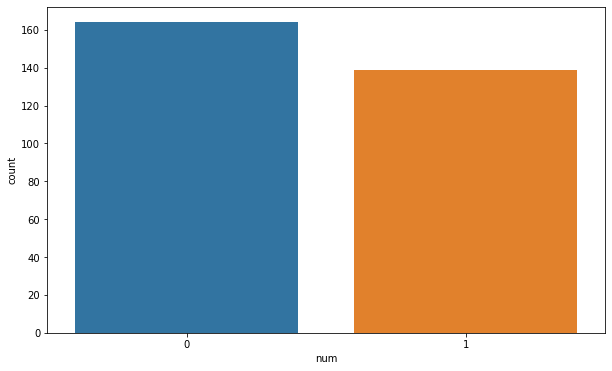

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='num', data=df)

<AxesSubplot:>

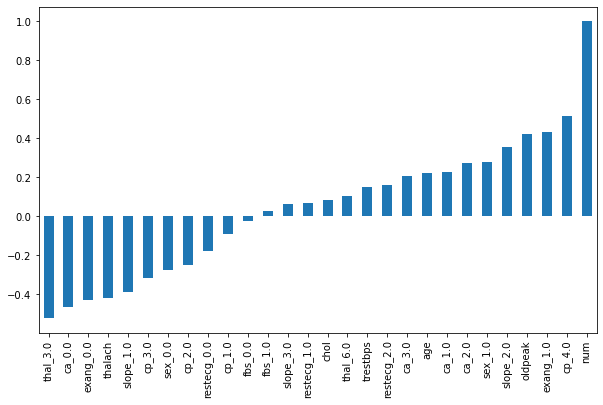

In [49]:
plt.figure(figsize=(10, 6))
df.corr()['num'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

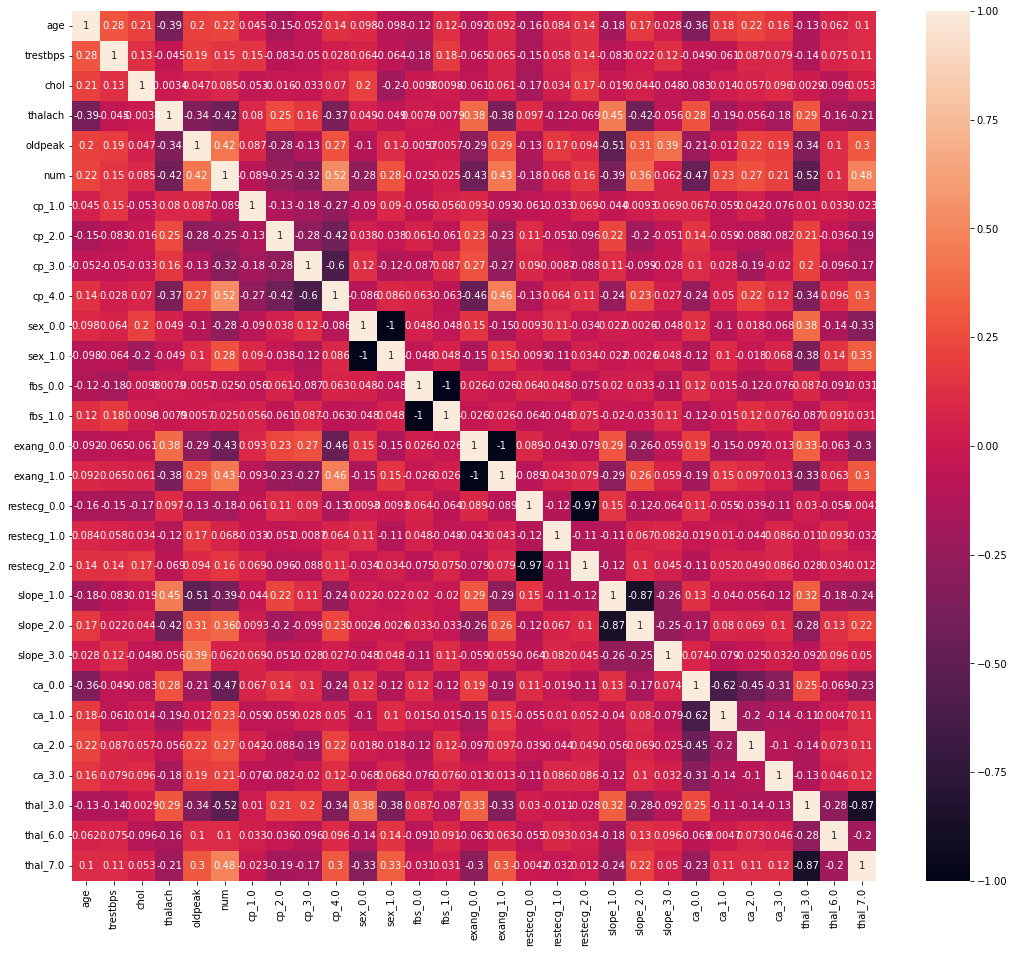

In [50]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True)

In [40]:
df.to_csv('updated_cleveland2.csv', index=False)

In [41]:
X = df.drop('num', axis=1).values
Y = df['num'].values

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=150)

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
x_train.shape, y_train.shape

((203, 13), (203,))

In [45]:
x_test.shape, y_test.shape

((88, 13), (88,))

# ***Model Building***

## ***SVM Model***

In [46]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [47]:
svm_predict = model.predict(x_test)

## ***ANN Model***

In [48]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(120,120,120), activation='relu', solver='adam', max_iter=400, early_stopping=True, random_state=101)

In [49]:
classifier.fit(x_train, y_train)
ann_predict = classifier.predict(x_test)

# ***Matrix Evaluation***

In [50]:
svm_cm = confusion_matrix(y_test, svm_predict)
svm_acc = accuracy_score(y_test, svm_predict)
svm_prec = precision_score(y_test, svm_predict,average='micro')
svm_rec = recall_score(y_test, svm_predict,average='micro')

ann_cm = confusion_matrix(y_test, ann_predict)
ann_acc = accuracy_score(y_test, ann_predict)
ann_prec = precision_score(y_test, ann_predict,average='micro')
ann_rec = recall_score(y_test, ann_predict,average='micro')

## ***Comparison Table***

In [51]:
print("SVM Accuracy:", svm_acc, "----------", "ANN Accuracy: ", ann_acc)
print("SVM Precision:",svm_prec,"----------", "ANN Precision: ",ann_prec)
print("SVM Recall:",   svm_rec, "----------", "ANN Recall: ", ann_rec)

SVM Accuracy: 0.5227272727272727 ---------- ANN Accuracy:  0.5454545454545454
SVM Precision: 0.5227272727272727 ---------- ANN Precision:  0.5454545454545454
SVM Recall: 0.5227272727272727 ---------- ANN Recall:  0.5454545454545454


# ***Plotting Classification Accuracy***

<AxesSubplot:title={'center':'SVM'}>

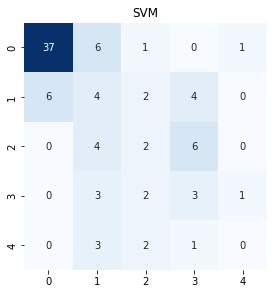

In [52]:
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 1)
plt.title("SVM")
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d", cbar=False)

<AxesSubplot:title={'center':'ANN'}>

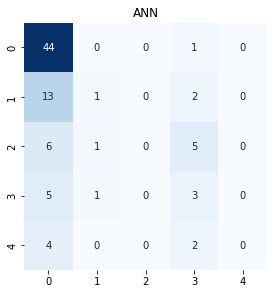

In [53]:
plt.figure(figsize=(20,10))
plt.subplot(2, 4, 2)
plt.title("ANN")
sns.heatmap(ann_cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [56]:
ann_fpr, ann_tpr, threshold = roc_curve(y_test, ann_predict)
auc_ann = auc(ann_fpr, ann_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_predict)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(ann_fpr, ann_tpr, linestyle='-', label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel("False Positive Rate----->")
plt.ylabel("True Positive Rate------>")

plt.title("Model Accuracy (AUC)")

plt.legend()
plt.show()

ValueError: multiclass format is not supported

# ***Dimensionality Reduction with PCA***

In [ ]:
def get_models():
	models = dict()
	for i in range(1,25):
		steps = [('pca', PCA(n_components=i)), ('m', SVC(kernel='linear'))]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
pca = PCA()
pca.fit(x_train)
pca.transform(x_train)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(x_train.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', label='Cumulative Explained Variance')
sns.barplot(np.arange(1, x_train.shape[1]+1), pca.explained_variance_ratio_, alpha=0.85,
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X_Train=X
Y_Train = Y
model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train,Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)
Selected_X.shape

0.09375


(291, 7)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [28]:
X_Train, X_validation, Y_Train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [29]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_validation)
print(confusion_matrix(Y_validation,predictionforest))
print(classification_report(Y_validation,predictionforest))

0.375
[[36  2  0]
 [21 23  1]
 [ 1  3  1]]
              precision    recall  f1-score   support

         1.0       0.62      0.95      0.75        38
         2.0       0.82      0.51      0.63        45
         3.0       0.50      0.20      0.29         5

    accuracy                           0.68        88
   macro avg       0.65      0.55      0.56        88
weighted avg       0.72      0.68      0.66        88



In [33]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier()
start = time.process_time()
model = model.fit(X_Train,Y_Train)
model = SelectFromModel(model, prefit=True)
print(time.process_time() - start)
Selected_X = model.transform(X_Train)
Selected_X.shape

0.046875


(203, 5)

In [36]:
start = time.process_time()
#X_validation = X_Test
#Y_validation = Y_Test
trainedforest = RandomForestClassifier(n_estimators=700).fit(Selected_X, Y_Train)
print(time.process_time() - start)
Selected_X_Test = model.transform(X_validation)
predictionforest = trainedforest.predict(Selected_X_Test)
print(confusion_matrix(Y_validation,predictionforest))
print(classification_report(Y_validation,predictionforest))

0.359375
[[33  5  0]
 [21 22  2]
 [ 1  3  1]]
              precision    recall  f1-score   support

         1.0       0.60      0.87      0.71        38
         2.0       0.73      0.49      0.59        45
         3.0       0.33      0.20      0.25         5

    accuracy                           0.64        88
   macro avg       0.56      0.52      0.52        88
weighted avg       0.65      0.64      0.62        88



Feature ranking:
1. feature 4 (0.302860)
2. feature 3 (0.280525)
3. feature 2 (0.153579)
4. feature 0 (0.138180)
5. feature 1 (0.124857)


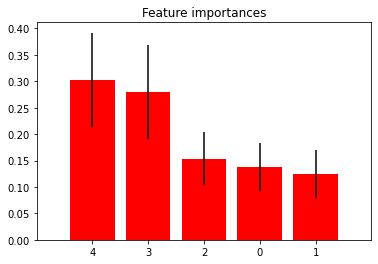

In [37]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances = trainedforest.feature_importances_
std = np.std([tree.feature_importances_ for tree in trainedforest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Selected_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Selected_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Selected_X.shape[1]), indices)
plt.xlim([-1, Selected_X.shape[1]])
plt.show()
